# SAT GPA DATASET
Using the above dataset to evaluate the different linear regression model to predict the GPA. 

## BUSINESS OBJECTIVE
* Maximize intake
* Minimize loss
* Maximize placements
* Maximize trust. 
* Maximize Quality. 

## CONSTRAINTS
* Location .
* Calamaties. 

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
| 1        | YearsExperience    | The Years of experience of the employee                     | Ratio    | Relevant      |
| 2        | Salary | The salary of the employee based on the years of experience.  | Ratio    | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass21\SAT_GPA.csv")
df=df0.copy()
df.head()

,SAT_Scores,GPA
0,206,2.3
1,214,2.4
2,717,3.5
3,580,2.8
4,404,2.6


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(200, 2)

In [4]:
df.dtypes

SAT_Scores      int64
GPA           float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT_Scores  200 non-null    int64  
 1   GPA         200 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,SAT_Scores,GPA
count,200.000000,200.000000
mean,491.810000,2.849500
std,174.893834,0.541076
min,202.000000,2.000000
25%,349.750000,2.400000
50%,480.500000,2.800000
75%,641.500000,3.400000
max,797.000000,3.900000


Checking the Number of Duplicates in the Dataset.

In [9]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Removing the duplicate values. 

In [8]:
df.drop_duplicates(keep='first',inplace=True)

Checking the Number and Percentage of Missing Values in the Dataset.

In [10]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 SAT_Scores    0
GPA           0
dtype: int64


In [11]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 SAT_Scores    174
GPA            20
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [12]:
df.mean()

SAT_Scores    493.843434
GPA             2.846970
dtype: float64

In [13]:
df.median()

SAT_Scores    481.5
GPA             2.8
dtype: float64

In [14]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_20832\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)


ModeResult(mode=array([[233. ,   2.5]]), count=array([[ 3, 18]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [15]:
df.var()

SAT_Scores    30423.391606
GPA               0.290118
dtype: float64

In [16]:
df.std()

SAT_Scores    174.423025
GPA             0.538626
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [17]:
df.skew()

SAT_Scores    0.044921
GPA           0.308109
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [18]:
df.kurt()

SAT_Scores   -1.223676
GPA          -1.030458
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_20832\522995607.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

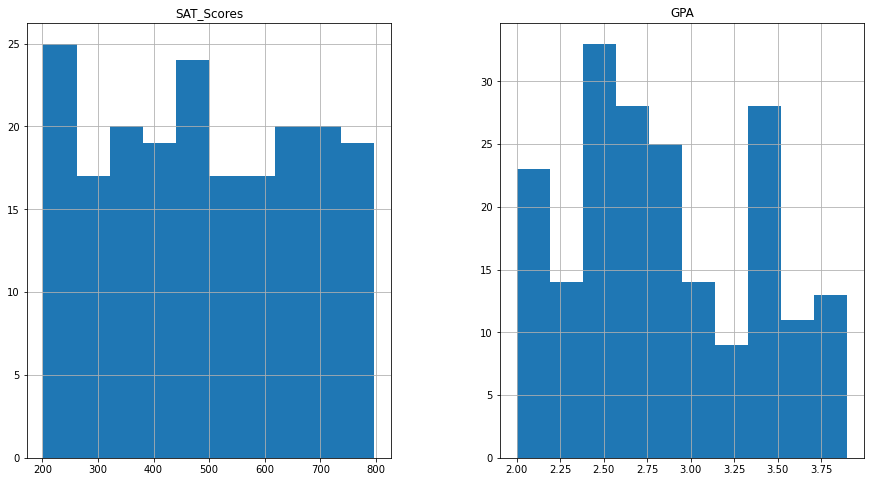

In [19]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df.hist(ax=ax)
plt.show

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


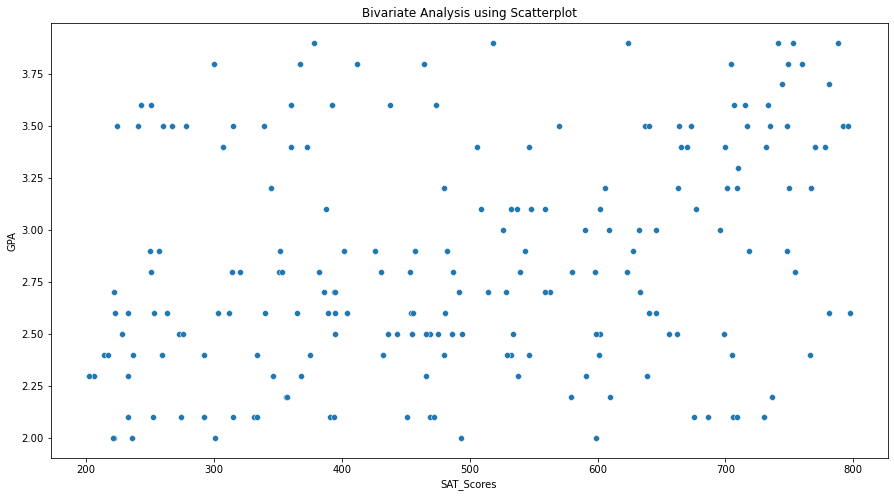

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['SAT_Scores'],df['GPA'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

In [21]:
df.columns

Index(['SAT_Scores', 'GPA'], dtype='object')

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SAT_Scores'>

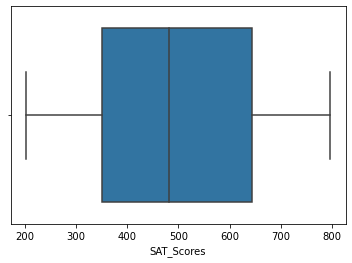

In [22]:
sns.boxplot(df['SAT_Scores'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GPA'>

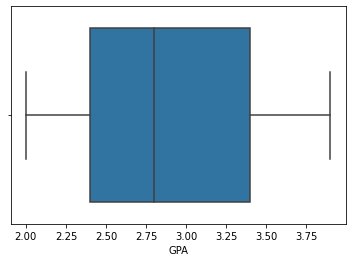

In [23]:
sns.boxplot(df['GPA'])

from the boxplots it is evident that there are no outliers in both the variables. 

__CORRELATION CHART__

<AxesSubplot:>

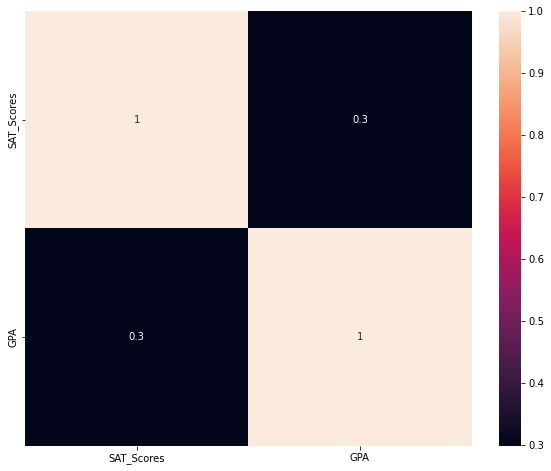

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

from the correlation chart it is clear that the YearsExperience has a very strong positive correlation with Salary.

In [26]:
cov_output = np.cov(df['SAT_Scores'], df['GPA'])[0, 1]
cov_output

28.033279495462235

A positive covariance indicates that the two variables tend to move together and with the same sign, a negative covariance indicates that the two variables tend to move in the opposite direction.<br>
__From the covariance value we can infer that the variables move in the same direction.__

### EVALUATING DIFFERENT  MODELS FOR  MODEL BUILDING

Importing the library required for evaluating the models. 

In [27]:
import statsmodels.formula.api as smf

__Simple Linear Regression__

Fitting the model

In [28]:
model1 = smf.ols("df['GPA'] ~ df['SAT_Scores']", data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              df['GPA']   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     19.16
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           1.96e-05
Time:                        12:07:48   Log-Likelihood:                -148.71
No. Observations:                 198   AIC:                             301.4
Df Residuals:                     196   BIC:                             308.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.3919      0.110     21.699      0.000       2.175       2.609
df['SAT_Scores']     0.0009      0.000      4.377      0.000       0.001       0.001
==============================================================================
Omnibus:                       11.942   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.209
Skew:                           0.307   Prob(JB):                       0.0272
Kurtosis:                       2.295   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Visualization to see how well the model fit the data.

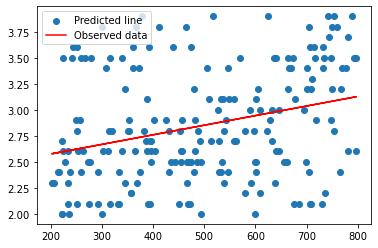

In [29]:
pred1 = model1.predict(pd.DataFrame(df['SAT_Scores']))

# Regression Line
plt.scatter(df['SAT_Scores'], df['GPA'])
plt.plot(df['SAT_Scores'], pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error Calculation

In [30]:
res1 = df['GPA'] - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

0.5127884107057589

__Model building on Transformed Data__<br>
* __Log Transformation__

Plotting the scatter plot to understand the correlation and regression line between the transformed variables. 

array([[1.        , 0.28026929],
       [0.28026929, 1.        ]])

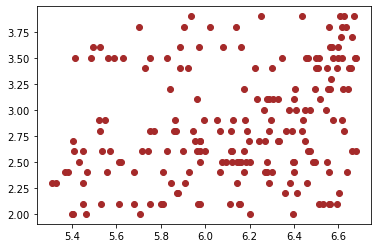

In [31]:
plt.scatter(x = np.log(df['SAT_Scores']), y = df['GPA'], color = 'brown')
np.corrcoef(np.log(df['SAT_Scores']), df['GPA']) #correlation

Fitting the model on the regression line

In [32]:
model2 = smf.ols("df['GPA'] ~ np.log(df['SAT_Scores'])", data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              df['GPA']   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     16.71
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           6.36e-05
Time:                        12:08:19   Log-Likelihood:                -149.84
No. Observations:                 198   AIC:                             303.7
Df Residuals:                     196   BIC:                             310.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.4508      0.587      0.767      0.444      -0.708       1.609
np.log(df['SAT_Scores'])     0.3907      0.096      4.088      0.000       0.202       0.579
==============================================================================
Omnibus:                       15.351   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.165
Skew:                           0.313   Prob(JB):                       0.0169
Kurtosis:                       2.227   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualization to see how well the model fit the data. 

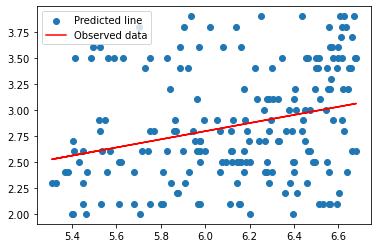

In [33]:
pred2 = model2.predict(pd.DataFrame(df['SAT_Scores']))

# Regression Line
plt.scatter(np.log(df['SAT_Scores']), df['GPA'])
plt.plot(np.log(df['SAT_Scores']), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error calculation

In [34]:
res2 = df['GPA'] - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

0.5157310661416383

* __Exponential transformation__

Plotting the scatter plot to understand the correlation between the transformed variables.

array([[1.        , 0.29817783],
       [0.29817783, 1.        ]])

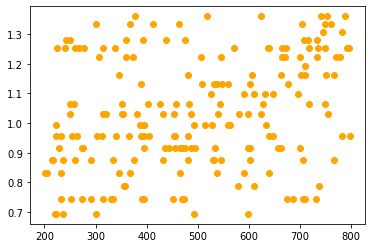

In [35]:
plt.scatter(x = df['SAT_Scores'], y = np.log(df['GPA']), color = 'orange')
np.corrcoef(df['SAT_Scores'], np.log(df['GPA'])) #correlation

Fitting the model on the regression line

In [36]:
model3 = smf.ols("np.log(df['GPA']) ~ df['SAT_Scores']", data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(df['GPA'])   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     19.13
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           1.98e-05
Time:                        12:08:36   Log-Likelihood:                 58.937
No. Observations:                 198   AIC:                            -113.9
Df Residuals:                     196   BIC:                            -107.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8692      0.039     22.505      0.000       0.793       0.945
df['SAT_Scores']     0.0003   7.38e-05      4.373      0.000       0.000       0.000
==============================================================================
Omnibus:                       10.630   Durbin-Watson:                   1.402
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                4.667
Skew:                           0.055   Prob(JB):                       0.0969
Kurtosis:                       2.256   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
pred3 = model3.predict(pd.DataFrame(df['SAT_Scores']))
pred3_at = np.exp(pred3)

Visualization to see how well the model fit the data.

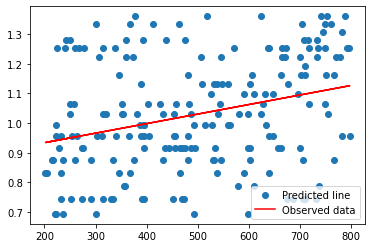

In [38]:
# Regression Line
plt.scatter(df['SAT_Scores'], np.log(df['GPA']))
plt.plot(df['SAT_Scores'], pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error calculation

In [39]:
res3 = df['GPA'] - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

0.5143520706362247

* __Polynomial transformation__

Fitting the model on the regression line

In [40]:
model4 = smf.ols("np.log(df['GPA']) ~ df['SAT_Scores'] + I(df['SAT_Scores']*df['SAT_Scores'])", data = df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(df['GPA'])   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     10.62
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           4.19e-05
Time:                        12:08:43   Log-Likelihood:                 59.954
No. Observations:                 198   AIC:                            -113.9
Df Residuals:                     195   BIC:                            -104.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  1.0174      0.111      9.138      0.000       0.798       1.237
df['SAT_Scores']                          -0.0004      0.000     -0.736      0.463      -0.001       0.001
I(df['SAT_Scores'] * df['SAT_Scores'])  6.816e-07    4.8e-07      1.419      0.158   -2.66e-07    1.63e-06
==============================================================================
Omnibus:                        8.058   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                3.921
Skew:                           0.028   Prob(JB):                        0.141
Kurtosis:                       2.313   Cond. No.                     2.83e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
pred4 = model4.predict(pd.DataFrame(df))
pred4_at = np.exp(pred4)

Visualization to see how well the model fit the data.

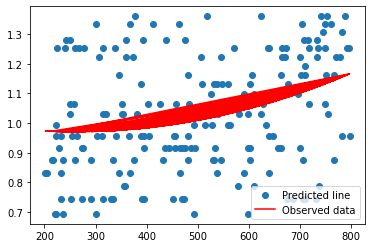

In [42]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = df.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = wcat.iloc[:, 1].values


plt.scatter(df['SAT_Scores'], np.log(df['GPA']))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error calculation

In [43]:
res4 = df['GPA']- pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

0.5106520912740431

__Log Transformation on both the variables__

Plotting the scatter plot to understand the correlation between the transformed variables.

array([[1.        , 0.28319888],
       [0.28319888, 1.        ]])

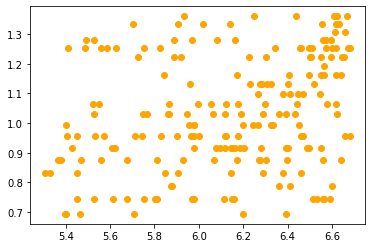

In [44]:
plt.scatter(x = np.log(df['SAT_Scores']), y = np.log(df['GPA']), color = 'orange')
np.corrcoef(np.log(df['SAT_Scores']), np.log(df['GPA'])) #correlation

Fitting the model

In [45]:
model5 = smf.ols("np.log(df['GPA']) ~ np.log(df['SAT_Scores'])", data = df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(df['GPA'])   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     17.09
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           5.28e-05
Time:                        12:08:57   Log-Likelihood:                 57.996
No. Observations:                 198   AIC:                            -112.0
Df Residuals:                     196   BIC:                            -105.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1802      0.206      0.876      0.382      -0.225       0.586
np.log(df['SAT_Scores'])     0.1383      0.033      4.134      0.000       0.072       0.204
==============================================================================
Omnibus:                       13.897   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.443
Skew:                           0.064   Prob(JB):                       0.0658
Kurtosis:                       2.198   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
pred5 = model5.predict(pd.DataFrame(df['SAT_Scores']))
pred5_at = np.exp(pred5)

Visualization to see how well the model fit the data.

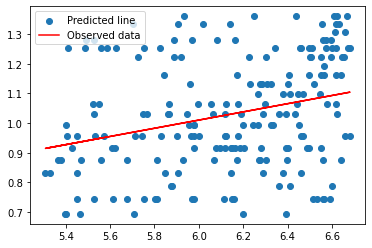

In [47]:
# Regression Line
plt.scatter(np.log(df['SAT_Scores']), np.log(df['GPA']))
plt.plot(np.log(df['SAT_Scores']), pred5, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error Calculation

In [48]:
res5 = df['GPA'] - pred5_at
res_sqr5 = res5 * res5
mse5 = np.mean(res_sqr5)
rmse5 = np.sqrt(mse5)
rmse5

0.5173814711966994

                   ** COMPARING THE IMPORTANT VALUES FOR ALL THE DIFFERENT MODELS TO SELECT THE BEST MODEL **

|               **OUTPUT**               |               **INPUT**              | **R VALUE** | **R^2 VALUE** | **RMSE VALUE** |
|:--------------------------------------:|:------------------------------------:|:------------|:-------------:|:--------------:|
|GPA                           |SAT_Scores                        | 0.3        | 0.089         | 0.5128         |
|GPA                           |log(SAT_Scores)                   | 0.28       | 0.079        | 0.5157         |
|log(GPA)                      |SAT_Scores                       | 0.298      | 0.089        | 0.514       |
|log(GPA)                      |SAT_Scores,SAT_Scores^2         |             | 0.098         | 0.510    |
|log(GPA)                      |log(SAT_Scores)                   |  0.283         | 0.08       | 0.517      |

#### CONCLUSION
From all the different models although the polynomial model had better values the p value were very high so considering that the simple model is the best.<br>
__So from the above information the simple linear regression model is the best model.__